In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit as q
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [4]:
def initialize(qc):
    """Apply a H-gate to the 2 qubits in qc"""
    qc.h(0)
    qc.h(1)
    qc.barrier()
    

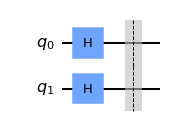

In [5]:
grover_circuit = q.QuantumCircuit(2)
initialize(grover_circuit)

grover_circuit.draw('mpl')

In [6]:
def oracle_11(qc):
    """Apply a controlled Z gate"""
    qc.cz(0, 1)
    qc.barrier()

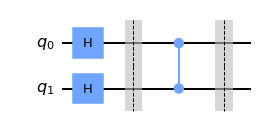

In [7]:
oracle_11(grover_circuit)
grover_circuit.draw('mpl')

In [8]:
def u_g(qc):
    """Apply diffusion operator"""
    qc.h(0)
    qc.h(1)
    qc.z(0)
    qc.z(1)
    qc.cz(0,1)
    qc.h(0)
    qc.h(1)
    qc.barrier()

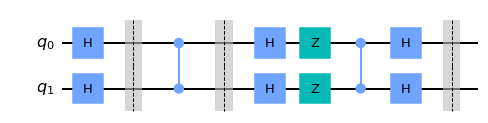

In [9]:
u_g(grover_circuit)        # temporary circuit just to see what U_s looks like
grover_circuit.draw('mpl')

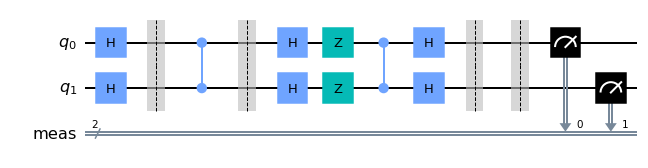

In [10]:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

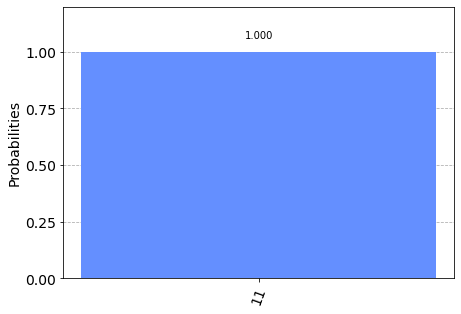

In [11]:
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(grover_circuit, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)